Initialized dataset torch.Size([35872, 256, 14]) torch.Size([35872, 256, 2])
1121
[2025-09-20 20:42:09.084756] Current batch item: 0, took 225 ms, loss: 0.7951928377151489, mean loss: 0.7951928377151489
[2025-09-20 20:42:15.129865] Current batch item: 250, took 6044 ms, loss: 0.21869716048240662, mean loss: 0.5069449990987778
[2025-09-20 20:42:21.186651] Current batch item: 500, took 6056 ms, loss: 0.16923585534095764, mean loss: 0.3943752845128377
[2025-09-20 20:42:27.251001] Current batch item: 750, took 6064 ms, loss: 0.13675576448440552, mean loss: 0.3299704045057297
[2025-09-20 20:42:33.335727] Current batch item: 1000, took 6084 ms, loss: 0.1758960783481598, mean loss: 0.2991555392742157
0.695704996585846 0.5306721925735474
1: loss mean = 0.6131885945796967, RSQ: 0.6131885945796967
1121
[2025-09-20 20:42:36.727077] Current batch item: 0, took 24 ms, loss: 0.1529715359210968, mean loss: 0.1529715359210968
[2025-09-20 20:42:42.832868] Current batch item: 250, took 6105 ms, loss: 0.

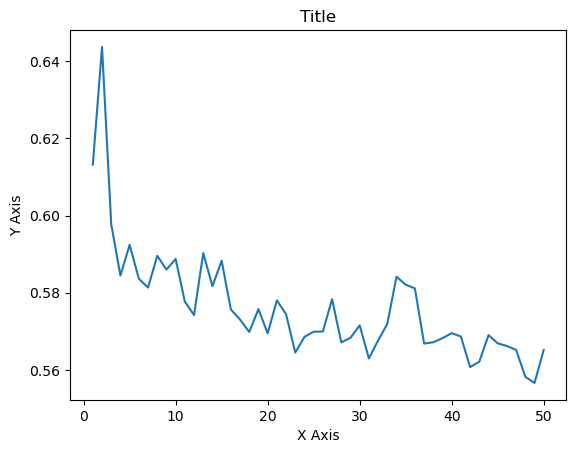

Evaluation mode activated, created training items
torch.Size([15996]) torch.Size([15996, 14])


In [ ]:
from qch2025.pkg.models.RNN import network as network
from qch2025.pkg.models.RNN import func as func

from qch2025.pkg.dataset import DS

import qch2025.pkg.plotting as plt

import numpy as np
import pandas as pd
import torch
import datetime

n_epochs = 50
window_size = 256
batch_size = 32
window_steps = 2
attn_heads = 4

learning_rate = 0.001
dropout = 0.2

dtype = torch.float32

# Training
train_dataset = DS(dataset_path="/home/ubuntu/repos/quantchallenge-2025/qch2025/dataset/train.csv",
                        window_size=window_size,
                        window_steps=window_steps,
                        dtype=dtype)

rnn = network.RNN(14, 512, 2, dropout, attn_heads, 2, device=torch.device("cuda"), dtype=dtype)
losses = func.train(rnn, dataset=train_dataset, epochs=n_epochs, learning_rate=learning_rate)

plt.plot_line(np.arange(1, n_epochs+1), losses)


#checkpoint = torch.load("/home/ubuntu/repos/quantchallenge-2025/weights/weights.pth", weights_only=True)
#rnn.load_state_dict(checkpoint['model_state_dict'])

eval = DS(dataset_path="/home/ubuntu/repos/quantchallenge-2025/qch2025/dataset/test.csv",
                    window_size=window_size,
                    window_steps=1,
                    eval=True,
                    device=torch.device("cuda"),
                    dtype=dtype)
print(eval.ids.shape, eval.train.shape)
y1, y2, ids = func.eval(rnn, eval)

df = pd.DataFrame({"id": ids, "Y1": y1, "Y2": y2})
df["id"] = df["id"] + 1
df.to_csv(f"/home/ubuntu/repos/quantchallenge-2025/qch2025/outputs/{datetime.datetime.now()}_predicted.csv")




